# SAS Explore 2023 - Unlock Your Data with Python and SAS Viya

This workshop will use the Python SWAT package on the SAS Viya platform to accelerate your data processing and analytics by taking advantage of SAS Cloud Analytic Services (CAS) on Viya. CAS is a high-performance in-memory analytic engine that performs massively parallel processing (MPP) on data of any size, working with multiple machines, CPUs, and threads for fast results.

You will learn how to access, explore, and analyze data on the distributed CAS server using both familiar Pandas API from the SWAT package, and specific SWAT methods.

**Sign in to JupyterLab**
1. Open Google Chrome and select the **Jupyter Server** bookmark. 
2. If necessary, sign in to JupyterLab by using the password **Student1**.
3. In the **Unlock your data with Python and SAS Viya** folder, open the **Unlock your data with Python and SAS Viya.ipynb** notebook.


**Resources**

- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)







### Simple performance test on 28 million rows of data:
**Local pandas**
- CPU times: total: 10min 2s
- Wall time: 9min 28s
- DataFrame was using 8.5+ GB of memory

**CAS server**
- CPU times: total: 2.98 s
- Wall time: 1min 51s

**NOTES**: 
- This was a simple performance test with a few summarization methods in each environment to achieve similar results. 
- I did not try to optimize the code on either the local Python client or the CAS server.
- My local Python client is limited to 16GB or memory.  
- With additional data exploration, preparation, and more advanced analytics the CAS server will continue to show improvements in speed.



For a more formal benchmarking check out The Futurum Group article [Faster AI & Analytics: SAS Viya Outperforms the Competition](https://futurumgroup.com/sas-viya/).
> "The Performance of SAS Viya was impressive, they didn't just outperform competing AI/ML libraries, they crushed the competition."

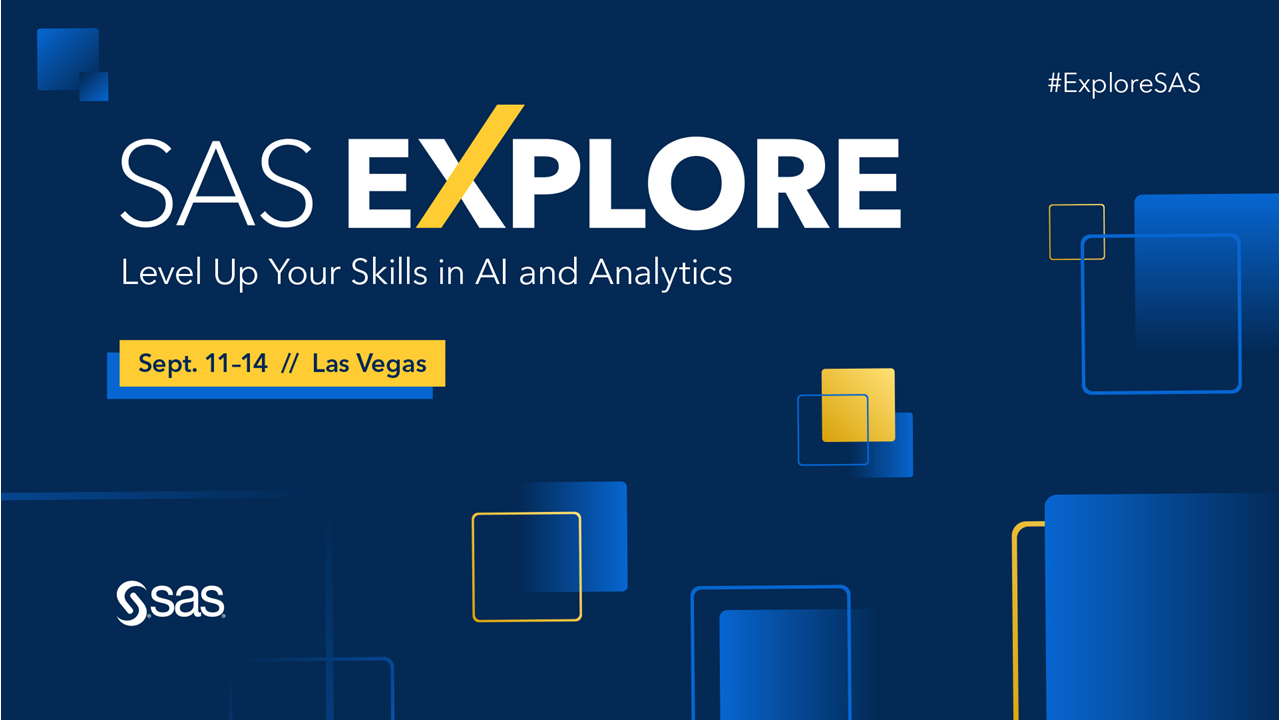

In [1]:
from IPython.display import Image
def display_image(img):
    ''' Custom function to display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True, width=1100)

display_image('Explore2023_01_Intro.png')

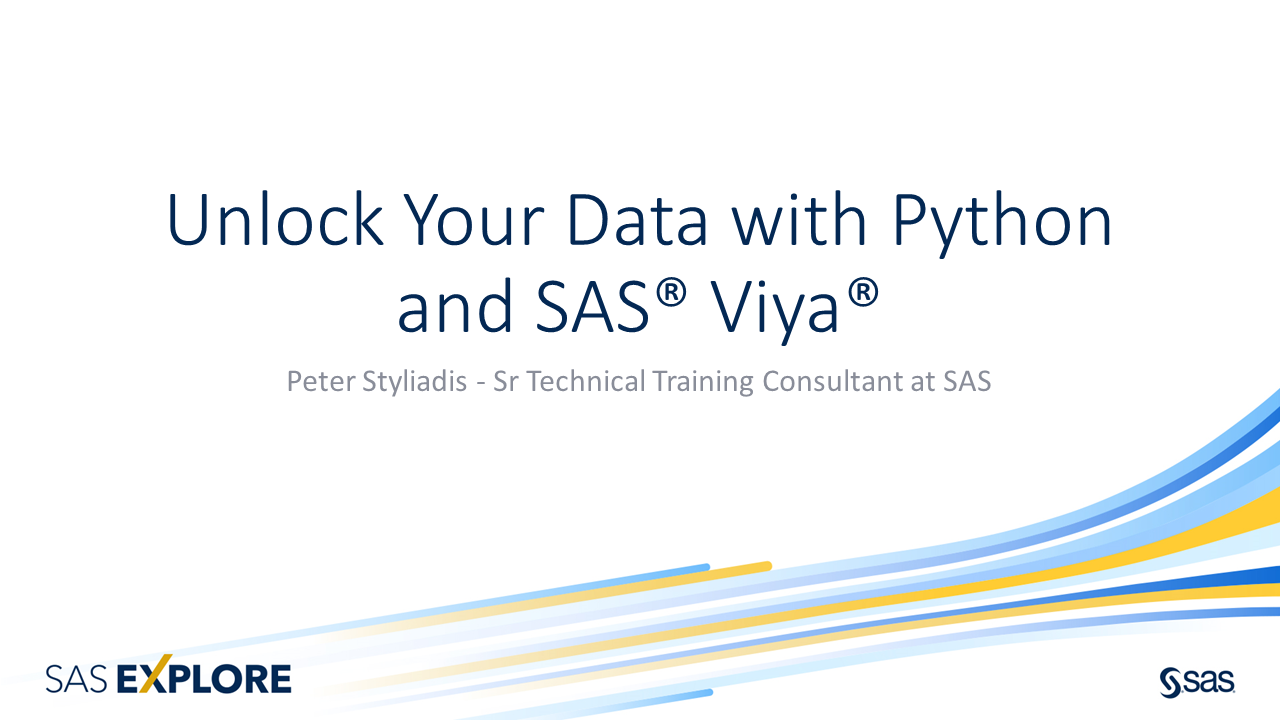

In [2]:
display_image('Explore2023_02_title.png')

# Introduction to SAS Viya

In [ ]:
display_image('Explore2023_03_viya.png')

**Expand notes below each slide for more information**

It all begins with data. Your organization likely has a variety of data sources, including data from relational databases, the cloud, folder paths, and Hadoop, as well as streaming data and more. 

With the SAS Viya platform, you can access these data sources with two analytic processing engines: the SAS Compute Server and SAS Cloud Analytic Services, or CAS. Let's discuss each of these at high level.

**SAS Compute Server**

The Compute Server on the SAS Viya platform enables you to execute traditional SAS code like you always have. The Compute Server is similar to the SAS®9 workspace server. If you have SAS programming knowledge or legacy SAS programs, you can still use the Compute Server to run your traditional SAS code with little to no modifications.  The Compute Server also includes some open source integration with Python and R.

**Cloud Analytic Services (CAS)**

The platform also includes the CAS server. CAS is the high-performance, in-memory massively parallel processing (MPP) analytic engine available in SAS Viya.

- CAS enables you to use a variety of programming languages like SAS, Python, R, Lua, or Java to process your data in parallel.
- SAS Viya point-and-click applications use the CAS server for creating dashboards and performing machine learning, text analytics, forecasting, and more.
- SAS Viya industry-specific solutions also use the CAS server's MPP environment (for example, SAS Anti-Money Laundering, SAS Model Risk Manager, SAS Customer Intelligence 360, and others).
- Lastly, you can create custom applications for your organization using the CAS server and REST APIs.

The CAS server is a powerful analytic engine built for the entire organization, no matter the job role, skill level, or programming language.

[SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)




**SAS Viya Architecture**

This architecture provides a single platform with end-to-end capabilities that unify technologies, people, and processes.

- It democratizes data and analytics by providing applications and programming languages that enable you to work with your data no matter your job role or skill level. This ensures that everyone can make faster, better decisions
- It is a cloud-native and cloud-agnostic platform, enabling your organization to run efficiently and smoothly, independent of cloud providers.
- Its in-memory engine and massively parallel processing capabilities can have a big impact on execution speed for your big data and resource-intensive programs.
- It enables SAS and open source programmers to easily work together in the language that they are most comfortable in.
- Together, these features provide a modern analytics engine that can take you from data access and preparation to relevant, actionable results, embedding proven AI that delivers results and helps you discover new opportunities. And it’s all through a scalable, web-based access for your data processing needs.


[SAS® Viya® - AI and Analytics Platform](https://www.sas.com/en_us/software/viya.html)

[Programming Documentation for the SAS® Viya® Platform](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsaswlcm/titlepage.htm?fromDefault=)

## CAS Server Overview

In [ ]:
display_image('Explore2023_04_cas.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection.

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casfun/titlepage.htm?fromDefault=)


For data to be processed in CAS, data is copied into memory from some physical storage, and data blocks are automatically distributed across the worker nodes. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends.

SAS Documentation - [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm)

In [ ]:
display_image('Explore2023_05_cas.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

## CAS Actions

In [ ]:
display_image('Explore2023_06_actions.png')

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data. These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

**SAS Documentation**
- [Actions by Name](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionsByName.htm)
- [Action Sets by Name](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionSetsByName.htm)

## SAS Viya and Python Workflow

In [ ]:
display_image('Explore2023_07_overview.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


# Begin Hands-On Workshop

In [ ]:
## Package required to connect to CAS
import swat         

## Local packages
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

print(f'Python version:{sys.version.split("|")[0]}')
print(f'swat version:{swat.__version__}')
print(f'pandas version:{pd.__version__}')
print(f'numpy version:{np.__version__}')

## 1. Connect to the CAS Server
**To connect to the CAS server, you need**
- the host name 
- the port number 
- authentication.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

[SWAT Package Authentication Documentation](https://sassoftware.github.io/python-swat/getting-started.html#authentication)

In [68]:
conn = swat.CAS("server.demo.sas.com", 30570, 'student', 'Metadata0')

View the type of the **conn** variable. Notice that it is a CAS connection object.

In [ ]:
type(conn)

Test the CAS connection and view the SAS Viya version.

In [ ]:
conn.about()['About']['Viya Version']

## 2. Set up the Workshop Data (REQUIRED)
The function below will create the data for this demonstration. It will create a file named **retail_sales.parquet** using sample data that comes with SAS Viya. This should run in all Viya environments.

In [ ]:
def setup_demo_data(datasourcefile, incaslib, outfilename, outcaslib, append_value=10, create_local_file = 'N'):
    '''
    Loads a CAS table into memory and then saves it back to a caslib in the specified file format.
    Depending on the size you create this could take a few minutes to run.
    If you create a local file this function could take some time to run. 
    
    Parameters
    -----------------
    datasourcefile : string
        Specify a server-side data source file to load into memory.
    incaslib : string
        Specify the caslib the data source file is located in.
    outfilename : string (filename.extension)
        Specify the name and extension of the file you want to save the CAS table as.
    outcaslib : string
        Specify what caslib to save the file back to.
    append_value : numeric value (default 10)
        Appends the table to itself n times
    create_local_file : values Y or N (default N)
        Will create a copy of the CAS table locally and increase the size of it based on the append_value value.
        Setting this to Y will increase the time for the function to execute. Please be patient.
    '''
    
    # Load data into memory abd name it demo_data in the casuser caslib
    conn.loadTable(path = datasourcefile, caslib = incaslib,
                   casout = {'name':'demo_data_raw', 
                             'caslib':'casuser', 
                             'replace':True})
    
    ## Create local file if requested. This can take between 5-10 minutes depending on the size.
    if create_local_file == 'Y':
        castbl = conn.CASTable('demo_data_raw', caslib = 'casuser')
        df = castbl.to_frame()
        pd.concat([df]*append_value).to_parquet('retail_sales.parquet')
        print('created the retail_sales.parquet file in your local directory')
    
    
    ## Duplicate the CAS table in a DATA step
    inputcastbl = 'casuser.demo_data_raw '
    append_n_times = append_value
    
    conn.runCode(code = f'''
        data casuser.demo_data;
            set {inputcastbl * append_n_times + ';'}
        run;
    ''')

    # Save the demo_data CAS table back to disk
    conn.save(table = {'name':'demo_data', 'caslib':'casuser'},
              name = outfilename, caslib = outcaslib, replace=True)
    
    # Drop the demo_data CAS table
    for castbl in ['demo_data', 'demo_data_raw']:
        conn.dropTable(castbl, caslib = 'casuser', quiet = True)

    
## Load demo data (uncomment the function below to create your data)

# setup_demo_data(datasourcefile='RAND_RETAILDEMO.sashdat', incaslib='samples', 
#                 outfilename='retail_sales.parquet', outcaslib='casuser')

## 3. Explore the Available Data on the CAS Server 

In [ ]:
display_image('Explore2023_08_caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View Available Caslibs
The caslibInfo action will display all available data connections to the CAS server.

In [ ]:
conn.caslibInfo()

### b. View Available CAS Tables
The [table.tableInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tableinfo.htm) CAS action will display all available in-memory CAS tables.

View available in-memory tables in the **Samples** caslib.

In [ ]:
conn.tableInfo(caslib = 'samples')

View available in-memory tables in the **Casuser** caslib.

In [ ]:
conn.tableInfo(caslib = 'casuser')

### c. View Available Data Source Files
The [table.fileInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-fileinfo.htm)  CAS action will display all available files in a caslib.

View available files in the **Samples** caslib.

In [ ]:
conn.fileInfo(caslib = 'samples')

View available files in the **Casuser** caslib.

In [ ]:
conn.fileInfo(caslib = 'casuser')

## 4. Load Data into Memory on the CAS Server (Server-Side)

Use the [table.loadTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm) CAS action to load the **retail_sales.parquet** file into memory on the distributed CAS server. Name the new CAS table **retail_sales** and place it in the **Casuser** caslib. 

**NOTE**: This is similar to using Pandas read_ methods to load files as DataFrames.

In [ ]:
conn.loadTable(path = 'retail_sales.parquet', caslib = 'casuser',
               casout = {
                   'name':'retail_sales',
                   'caslib':'casuser',
                   'replace':True
               })

View available in-memory tables in the **Casuser** caslib. Notice that the **RETAIL_SALES** CAS table is now an in-memory CAS table.

In [ ]:
conn.tableInfo(caslib = 'casuser')

## 5. Explore the CAS Table

### a. Reference the CAS table
Create a client-side reference to the CAS table named **castbl**. Then display the value and type of **castbl**. Notice that it is a **CASTable** object and is referencing the **retail_sales** CAS table in the **Casuser** caslib. 

In [ ]:
castbl = conn.CASTable('retail_sales', caslib = 'casuser')

display(type(castbl), castbl)

Preview the CAS table using the SWAT head method.

In [ ]:
castbl.head()

Use the tableDetails CAS action to get detailed information about a CAS table. Notice that the CAS table is broken up into blocks for distributed processing.

In [ ]:
castbl.tableDetails()

### b. Preview the CAS Table

You can execute the SWAT head method on a **CASTable** object to return five rows to your Python client. The head method executes on the CAS server, and the CAS server returns five rows to the Python client as a **SASDataFrame** object.

A **SASDataFrame** object is a subclass to a **pandas.DataFrame**. For the most part, you don’t need to worry about the difference between a **SASDataFrame** and a **panda.DataFrame**. They work the same way. The only difference is that a **SASDataFrame** contains extra attributes to store the SAS metadata such as title, label, and name. If you see a **SASDataFrame** object, that data lives on your client.

In [ ]:
df = castbl.head()

display(type(df), df)

### c. Basic CAS Table Exploration

View the number of rows and columns in a CAS table using the SWAT shape attribute.

In [ ]:
castbl.shape

You can also use the numRows CAS action for similar results.

In [ ]:
castbl.numRows()

Use the [table.columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-columninfo.htm) CAS action to return column information.

In [ ]:
castbl.columnInfo()

View the number of missing values in each column using the SWAT nmiss method. This is similar to using the isna and sum methods in Pandas. The processing will be completed on the distributed CAS server and a **series** will be returned to the Python client.

In [ ]:
castbl.nmiss()

### d. Explore Categorical Columns

Find the count of unique values in a CAS table using the SWAT package value_counts method. The CAS server summarizes the data and returns a **series** to the Python client.

In [ ]:
(castbl                          ## CAS table
 .age_bucket                     ## CAS table column
 .value_counts(normalize=True)   ## SWAT package value_counts method
)

The SWAT package enables you to summarize your data on the distributed CAS server and then work with the smaller summarized results on the Python client. 

Here we will plot the **series** returned from the CAS server on the client using the Pandas plot method.

In [ ]:
df = (castbl                          ## CAS table
      .age_bucket                     ## CAS table column
      .value_counts(normalize=True)   ## SWAT package value_counts method
)

## Plot the Series on the Python client using Pandas
df.plot(kind='bar', figsize=(8,6));

### e. Explore Numeric Columns

You can view descriptive statistics of a CAS table using the SWAT describe method. Notice that the results are similar to the Pandas describe method.

In [ ]:
castbl.describe()

You can also use the [simple.summary](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-summary.htm?fromDefault=) CAS action will return similar results.

In [ ]:
castbl.summary()

### f. Filter CAS Tables

You can use the SWAT query method to query a CAS table. This works similarly to the Pandas query method.

In [ ]:
(castbl                            ## CASTable object
 .query('age_bucket = "26-35"')    ## SWAT query method
 .loyalty_card                     ## CAS column
 .value_counts()                   ## SWAT value_counts method
)

### g. Group CAS Tables

You can also aggregate data by groups using the SWAT groupby method. This is similar to the Pandas groupby method.

In [ ]:
(castbl                             ## CASTable object
 .groupby(['Year','age_bucket'])    ## Grouping columns
 .loc[:,['Sales','Cost']]           ## Sepcify the columns to aggregate
 .sum()                             ## Aggregate function
)

### h. Execute SQL on the CAS Server

In [ ]:
## Load the fedSQL action set to execute SQL in CAS.
conn.loadActionSet('fedSQL')

## Store a simple SQL query
myQuery = '''
    select year, 
           age_bucket,
           sum(sales) as Total_Sales,
           sum(cost) as Total_Cost
        from casuser.retail_sales
        group by year, age_bucket
        order by year, age_bucket
'''

## Execute the query in the CAS server
cr = conn.execDirect(query = myQuery)

display(type(cr), cr)

After the data is summarized by the CAS server and returned to the client, you can process the data locally using familiar packages.

In [ ]:
df = (cr['Result Set']
      .assign(Year = lambda _df: _df.Year.astype('int32'))
      .rename(columns=str.lower)
     )

display(df.head(10))

## Plot the DataFrame using seaborn
ax = sns.barplot(data=df, x='year', y='total_sales', hue='age_bucket')
ax.legend(title='Age Buckets')
ax.set_xlabel('')
ax.set_ylabel('Millions');

## 5. Prepre the CAS Table

Preview the CAS table.

In [ ]:
castbl.head()

### a. Create CAS Table Columns

Create two new columns in the CAS table using the eval method. The eval method takes [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/lefunctionsref/n01f5qrjoh9h4hn1olbdpb5pr2td.htm).

In [41]:
castbl.eval('Profit = Sales - Cost')
castbl.eval("loyalty_card_value = IFC(loyalty_card=0,'No Loyalty Card','Loyalty Card')")

View the **CASTable** object. Notice that the eval method added parameters to the **CASTable** object on how to calculate the columns. A **CASTable** object is lazily evaluated and the columns will be calculated only when an action or method is executed on the object.

In [ ]:
castbl.params

Execute the head method on the **CASTable** object. Notice that the new columns were created.

In [ ]:
castbl.head()

### b. Create a New CAS Table

Create a new CAS table that contains the two new columns from above.

In [ ]:
castbl.copyTable(casout={'name':'sales_final', 
                         'caslib':'casuser', 
                         'label':'Final table with two new calculated columns'})

View all available in-memory CAS tables. Confirm that the new **SALES_FINAL** CAS table was created.

In [ ]:
conn.tableInfo(caslib = 'casuser')

Reference and preview the new **SALES_FINAL** CAS table.

In [ ]:
final_castbl = conn.CASTable('sales_final', caslib = 'casuser')

display(final_castbl, final_castbl.head())

### c. Save the CAS Table to the Data Source
Save a CAS table to a caslib's data source using the [table.save](https://go.documentation.sas.com/doc/en/pgmsascdc/v_037/caspg/cas-table-save.htm) CAS action. This is similar to saving a DataFrame back to disk using a to_ method in Pandas.

In [ ]:
final_castbl.save(name = 'sales_final.sashdat', caslib = 'casuser', replace = True)

# final_castbl.save(name = 'sales_final.parquet', caslib = 'casuser', replace = True)

# final_castbl.save(name = 'sales_final.csv', caslib = 'casuser', replace = True)

View the newly saved files in the **Casuser** caslib. Confirm that the **sales_final.sashdat** file was created.

In [ ]:
conn.fileInfo(caslib = 'casuser')

## 6. Doing More with the SAS Viya Platform

### a. Machine learning
You can use action sets like the [Regression Action Set](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casactstat/casactstat_regression_toc.htm?fromDefault=) to perform machine learning on the distributed CAS server. This example use the GLM action to fit linear regression models using the method of least squares.

In [ ]:
conn.loadActionSet('regression')

target = 'Sales'
inputs = ['Cost', 'mkt_bdgt', 'Margin']

final_castbl.glm(target = target,
                 inputs = inputs)

### b. Other SAS Viya Applications
You can use other SAS Viya applications like SAS Visual Analytics on the data you prepared using Python.

In [ ]:
display_image('00_VA_Covid.png')

#### Open SAS Visual Analytics and Access the CAS Table
1. Open a new tab in your browser.
2. Log in to SAS Viya.
3. At the top left click the **Applications menu** ![Image](https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/Icons_ApplicationButton.png) icon.
4. Select **Explore and Visualize** to access the SAS Visual Analytics application.
5. Then select **Start with Data > Data Sources > cas-shared-default > Casuser**.
6. Right-click the **sales_final.sashdat** file and select **Load**. This will load the final data into memory.

## 7. Terminate the CAS Connection

Let's delete the files we created in this demo using the [deleteSource](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-deletesource.htm) CAS action.

In [ ]:
delFiles = ['retail_sales.parquet', 'sales_final.sashdat']

for file in delFiles:
    conn.deleteSource(source = file, caslib = 'casuser', quiet = True) 

When you are finished, it's best practice to terminate your CAS connection.

In [55]:
conn.terminate()

# Additional Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Additional Resources
- [My Python-Integration-to-SAS-Viya GitHub Repo](https://github.com/pestyld/Python-Integration-to-SAS-Viya)
- [SAS Viya Quick Start Videos](https://video.sas.com/category/videos/sas-viya-quick-start)
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)

# Thank You for Attending!

## Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS